In [134]:
import pandas as pd

In [135]:
sales = pd.read_csv('sales.csv')

In [136]:
sales.head()

,order_id,customer_id,product_id,quantity,price,order_date,region
0,1,162,29,1,492.11,2024-02-03,North
1,2,133,79,1,76.00,2023-04-01,East
2,3,179,81,3,441.70,2023-12-07,South
3,4,120,68,1,289.98,2024-08-07,North
4,5,42,2,1,236.52,2025-03-12,West


In [137]:
product = pd.read_csv('products.csv')

In [138]:
product.head()

,product_id,product_name,category
0,1,Product_1,Electronics
1,2,Product_2,Books
2,3,Product_3,Home
3,4,Product_4,Home
4,5,Product_5,Books


In [139]:
pd.to_datetime(sales['order_date']).reset_index(drop=True).head()

0   2024-02-03
1   2023-04-01
2   2023-12-07
3   2024-08-07
4   2025-03-12
Name: order_date, dtype: datetime64[ns]

In [140]:
sales["Total Sales"] = sales.quantity*sales.price

In [141]:
sales

,order_id,customer_id,product_id,quantity,price,order_date,region,Total Sales
0,1,162,29,1,492.11,2024-02-03,North,492.11
1,2,133,79,1,76.00,2023-04-01,East,76.00
2,3,179,81,3,441.70,2023-12-07,South,1325.10
3,4,120,68,1,289.98,2024-08-07,North,289.98
4,5,42,2,1,236.52,2025-03-12,West,236.52
...,...,...,...,...,...,...,...,...
995,996,91,55,3,228.24,2024-04-08,South,684.72
996,997,123,33,3,260.72,2024-04-27,North,782.16
997,998,65,25,1,162.58,2025-07-10,North,162.58
998,999,67,42,4,91.36,2025-07-01,East,365.44


In [142]:
topProducts = sales.groupby('product_id')['Total Sales'].sum().sort_values(ascending=False)

In [143]:
topProducts.reset_index().merge(product[['product_id', 'product_name']], on='product_id')

,product_id,Total Sales,product_name
0,79,15028.90,Product_79
1,28,13432.19,Product_28
2,8,11813.89,Product_8
3,71,11659.78,Product_71
4,75,11303.60,Product_75
...,...,...,...
95,31,2608.85,Product_31
96,34,2421.69,Product_34
97,68,1281.37,Product_68
98,17,641.53,Product_17


In [144]:
findingCategory = pd.merge(sales, product, on='product_id', how='inner')

In [145]:
findingCategory.value_counts('category', ascending=False)

category
Books          332
Home           245
Toys           224
Electronics    199
Name: count, dtype: int64

In [146]:
findingCategory

,order_id,customer_id,product_id,quantity,price,order_date,region,Total Sales,product_name,category
0,1,162,29,1,492.11,2024-02-03,North,492.11,Product_29,Toys
1,2,133,79,1,76.00,2023-04-01,East,76.00,Product_79,Electronics
2,3,179,81,3,441.70,2023-12-07,South,1325.10,Product_81,Books
3,4,120,68,1,289.98,2024-08-07,North,289.98,Product_68,Books
4,5,42,2,1,236.52,2025-03-12,West,236.52,Product_2,Books
...,...,...,...,...,...,...,...,...,...,...
995,996,91,55,3,228.24,2024-04-08,South,684.72,Product_55,Toys
996,997,123,33,3,260.72,2024-04-27,North,782.16,Product_33,Electronics
997,998,65,25,1,162.58,2025-07-10,North,162.58,Product_25,Home
998,999,67,42,4,91.36,2025-07-01,East,365.44,Product_42,Toys


In [147]:
topSales = findingCategory[['category', 'quantity']]

In [148]:
topSales.groupby('category').sum().sort_values(by='quantity', ascending=False)

,quantity
category,
Books,822
Home,625
Toys,563
Electronics,516


In [149]:
top_sales = findingCategory[['product_id', 'category', 'product_name', 'quantity', 'Total Sales']]

In [150]:
top_sales.groupby('product_name')['quantity'].sum().sort_values(ascending=False)

product_name
Product_79    46
Product_28    44
Product_8     44
Product_71    43
Product_75    41
              ..
Product_9     10
Product_31    10
Product_68     6
Product_17     4
Product_5      2
Name: quantity, Length: 100, dtype: int64

In [151]:
top_sales.groupby('product_name')['Total Sales'].sum().sort_values(ascending=False)

product_name
Product_79    15028.90
Product_28    13432.19
Product_8     11813.89
Product_71    11659.78
Product_75    11303.60
                ...   
Product_31     2608.85
Product_34     2421.69
Product_68     1281.37
Product_17      641.53
Product_5       566.53
Name: Total Sales, Length: 100, dtype: float64

In [152]:
sales.head()

,order_id,customer_id,product_id,quantity,price,order_date,region,Total Sales
0,1,162,29,1,492.11,2024-02-03,North,492.11
1,2,133,79,1,76.00,2023-04-01,East,76.00
2,3,179,81,3,441.70,2023-12-07,South,1325.10
3,4,120,68,1,289.98,2024-08-07,North,289.98
4,5,42,2,1,236.52,2025-03-12,West,236.52


In [153]:
product.head()

,product_id,product_name,category
0,1,Product_1,Electronics
1,2,Product_2,Books
2,3,Product_3,Home
3,4,Product_4,Home
4,5,Product_5,Books


In [154]:
sales.groupby('region').agg(
    regionSale = ('Total Sales', 'sum'),
    averageSale = ('Total Sales', 'mean')
).reset_index()

,region,regionSale,averageSale
0,East,163273.45,669.153484
1,North,178825.42,659.872399
2,South,174339.86,675.735891
3,West,139374.33,613.983833


In [155]:
mergedData = sales.merge(product, on = 'product_id', how='inner')

In [156]:
mergedData.pivot_table(
    index='category',
    columns='region',
    values='Total Sales',
    aggfunc='sum',
    fill_value=0
)

region,East,North,South,West
category,,,,
Books,53265.68,66036.61,52863.31,35206.48
Electronics,29467.39,32754.46,37111.76,34832.80
Home,34846.92,43569.71,40987.28,37459.61
Toys,45693.46,36464.64,43377.51,31875.44


In [161]:
sales['order_date'] = pd.to_datetime(sales['order_date'])

In [162]:
sales['Month'] = sales['order_date'].dt.to_period('M')

In [165]:
monthlySales = sales.groupby('Month')['Total Sales'].sum()

In [167]:
import matplotlib.pyplot as plt

<Axes: title={'center': 'Total Monthly Sales'}, xlabel='Months', ylabel='Total Sales'>

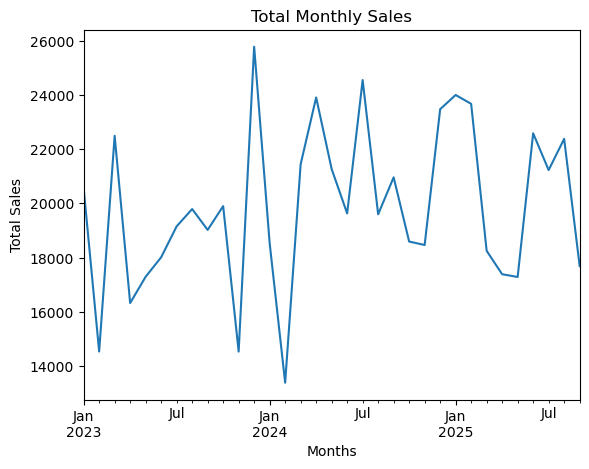

In [173]:
monthlySales.plot(kind='line', title='Total Monthly Sales', xlabel='Months', ylabel='Total Sales')

In [177]:
monthlySales.idxmax()

Period('2023-12', 'M')

In [187]:
def classify_category(total_sales):
    if total_sales<100:
        return 'Low Sales'
    elif total_sales<600:
        return 'Medium Sales'
    else:
        return 'High Sales'
sales['sales_category'] = sales['Total Sales'].apply(classify_category)

In [188]:
sales

,order_id,customer_id,product_id,quantity,price,order_date,region,Total Sales,Month,sales_category
0,1,162,29,1,492.11,2024-02-03,North,492.11,2024-02,Medium Sales
1,2,133,79,1,76.00,2023-04-01,East,76.00,2023-04,Low Sales
2,3,179,81,3,441.70,2023-12-07,South,1325.10,2023-12,High Sales
3,4,120,68,1,289.98,2024-08-07,North,289.98,2024-08,Medium Sales
4,5,42,2,1,236.52,2025-03-12,West,236.52,2025-03,Medium Sales
...,...,...,...,...,...,...,...,...,...,...
995,996,91,55,3,228.24,2024-04-08,South,684.72,2024-04,High Sales
996,997,123,33,3,260.72,2024-04-27,North,782.16,2024-04,High Sales
997,998,65,25,1,162.58,2025-07-10,North,162.58,2025-07,Medium Sales
998,999,67,42,4,91.36,2025-07-01,East,365.44,2025-07,Medium Sales
